# SALES DATA ANALYSIS

# Import Modules 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# -----------warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Q1 ANSWERS 

## DATA CLEANING

In [2]:
df1=pd.read_csv(r"C:\Users\HP\Documents\company assignment\train.csv")
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


## checked dimension

In [3]:
df1.shape

(550068, 12)

### Checking null values

In [4]:
df1.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df1["Product_Category_2"].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [7]:
df1['Product_Category_2'].fillna(df1["Product_Category_2"].mean(),inplace=True)

In [8]:
df1["Product_Category_3"].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [9]:
df1['Product_Category_3'].fillna(df1["Product_Category_3"].mean(),inplace=True)

In [10]:
df1['Product_Category_3'].unique()

array([12.66824321, 14.        , 17.        ,  5.        ,  4.        ,
       16.        , 15.        ,  8.        ,  9.        , 13.        ,
        6.        , 12.        ,  3.        , 18.        , 11.        ,
       10.        ])

## Checked Nosie

In [11]:
df1.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [12]:
col_1=['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']

In [13]:
for i in col_1:
    print(df1[i].unique(),"\n")

[1000001 1000002 1000003 ... 1004113 1005391 1001529] 

['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853'] 

['F' 'M'] 

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 

[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] 

['A' 'C' 'B'] 

['2' '4+' '3' '1' '0'] 

[0 1] 

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19] 

[ 9.84232925  6.         14.          2.          8.         15.
 16.         11.          5.          3.          4.         12.
  9.         10.         17.         13.          7.         18.        ] 

[12.66824321 14.         17.          5.          4.         16.
 15.          8.          9.         13.          6.         12.
  3.         18.         11.         10.        ] 

[ 8370 15200  1422 ...   135   123   613] 



In [14]:
df1["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [15]:
map_gender_1 = {'F':1, 'M':2}

In [16]:
df1["Gender"]=df1["Gender"].map(map_gender_1).astype("int64")

In [17]:
df1["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [18]:
map_age_train = {'0-17': 1, '18-25': 5, '26-35': 7, '36-45': 6, '46-50': 4, '51-55': 3, '55+': 2}

In [19]:
df1["Age"]=df1["Age"].map(map_age_train)

In [20]:
df1["Stay_In_Current_City_Years"]=df1["Stay_In_Current_City_Years"].replace('\D','',regex=True)

In [21]:
df1["Stay_In_Current_City_Years"].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [22]:
df1["Stay_In_Current_City_Years"]=pd.to_numeric(df1["Stay_In_Current_City_Years"], errors="coerce")

In [23]:
df1.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,1,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,1,1,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,1,1,10,A,2,0,12,9.842329,12.668243,1422


In [24]:
df1.drop(columns="Product_ID",inplace=True)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 46.2+ MB


# Test Dataset 

In [26]:
df2=pd.read_csv(r"C:\Users\HP\Documents\company assignment\test.csv")
df2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [27]:
df2.shape

(233599, 11)

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


## Checked Null

In [29]:
df2.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [30]:
df2['Product_Category_2'].fillna(df2["Product_Category_2"].mean(),inplace=True)

In [31]:
df2['Product_Category_3'].fillna(df2["Product_Category_3"].mean(),inplace=True)

In [32]:
df2.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

## Checked Noise

In [33]:
col_2=['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']

In [34]:
for i in col_2:
    print(df2[i].unique(),"\n")

[1000004 1000009 1000010 ... 1001656 1005796 1001189] 

['P00128942' 'P00113442' 'P00288442' ... 'P00270742' 'P00253842'
 'P00325442'] 

['M' 'F'] 

['46-50' '26-35' '36-45' '18-25' '51-55' '55+' '0-17'] 

[ 7 17  1 15  3  0  8 16  4 12 13 18 11  9  2 20 14 10  6 19  5] 

['B' 'C' 'A'] 

['2' '0' '4+' '1' '3'] 

[1 0] 

[ 1  3  5  4  2 10 15 18  8 13  6 11 12  7 16 14 17  9] 

[11.          5.         14.          9.          3.          4.
 13.          2.          9.84958606  8.         15.         17.
 12.         16.          6.         10.         18.          7.        ] 

[12.66945395 12.         15.          9.         16.         14.
  4.          3.          5.          8.         17.         13.
 11.         10.          6.         18.        ] 



In [35]:
df2["Gender"].value_counts()

M    175772
F     57827
Name: Gender, dtype: int64

In [36]:
map_gender_2 = {'F':1, 'M':2}

In [37]:
df2["Gender"]=df2["Gender"].map(map_gender_2)

In [38]:
df2["Gender"]=pd.to_numeric(df2["Gender"], errors="coerce")

In [39]:
df2["Age"].value_counts()

26-35    93428
36-45    46711
18-25    42293
46-50    19577
51-55    16283
55+       9075
0-17      6232
Name: Age, dtype: int64

In [40]:
map_age_test = {'0-17': 1, '18-25': 5, '26-35': 7, '36-45': 6, '46-50': 4, '51-55': 3, '55+': 2}

In [41]:
df2["Age"]=df2["Age"].map(map_age_test)

In [42]:
df2["Stay_In_Current_City_Years"]=df2["Stay_In_Current_City_Years"].replace('\D','',regex=True)

In [43]:
df2["Stay_In_Current_City_Years"]=pd.to_numeric(df2["Stay_In_Current_City_Years"], errors="coerce")

In [44]:
df2.drop(columns="Product_ID",inplace=True)

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Gender                      233599 non-null  int64  
 2   Age                         233599 non-null  int64  
 3   Occupation                  233599 non-null  int64  
 4   City_Category               233599 non-null  object 
 5   Stay_In_Current_City_Years  233599 non-null  int64  
 6   Marital_Status              233599 non-null  int64  
 7   Product_Category_1          233599 non-null  int64  
 8   Product_Category_2          233599 non-null  float64
 9   Product_Category_3          233599 non-null  float64
dtypes: float64(2), int64(7), object(1)
memory usage: 17.8+ MB


# DATA PREPROCESSING

In [46]:
df1.describe()

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.00000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,1.753105,5.54823,8.076707,1.858418,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,0.431205,1.62801,6.522660,1.289443,0.491770,3.936211,4.207852,2.271830,5023.065394
min,1.000001e+06,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,5.00000,2.000000,1.000000,0.000000,1.000000,8.000000,12.668243,5823.000000
50%,1.003077e+06,2.000000,6.00000,7.000000,2.000000,0.000000,5.000000,9.842329,12.668243,8047.000000
75%,1.004478e+06,2.000000,7.00000,14.000000,3.000000,1.000000,8.000000,14.000000,12.668243,12054.000000
max,1.006040e+06,2.000000,7.00000,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [47]:
df1.corr()

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.033474,0.037594,-0.023971,-0.030737,0.020443,0.003825,0.001267,0.001888,0.004716
Gender,-0.033474,1.000000,0.037158,0.117291,0.014660,-0.011603,-0.045594,-0.015300,0.014978,0.060346
Age,0.037594,0.037158,1.000000,-0.035127,0.027215,-0.082919,-0.027491,-0.006840,-0.002923,-0.000126
Occupation,-0.023971,0.117291,-0.035127,1.000000,0.030005,0.024280,-0.007618,-0.000317,0.007265,0.020833
Stay_In_Current_City_Years,-0.030737,0.014660,0.027215,0.030005,1.000000,-0.012819,-0.004213,-0.001368,0.001148,0.005422
Marital_Status,0.020443,-0.011603,-0.082919,0.024280,-0.012819,1.000000,0.019888,0.012507,0.010695,-0.000463
Product_Category_1,0.003825,-0.045594,-0.027491,-0.007618,-0.004213,0.019888,1.000000,0.373686,0.082711,-0.343703
Product_Category_2,0.001267,-0.015300,-0.006840,-0.000317,-0.001368,0.012507,0.373686,1.000000,0.320195,-0.179309
Product_Category_3,0.001888,0.014978,-0.002923,0.007265,0.001148,0.010695,0.082711,0.320195,1.000000,-0.012261
Purchase,0.004716,0.060346,-0.000126,0.020833,0.005422,-0.000463,-0.343703,-0.179309,-0.012261,1.000000


In [48]:
df1.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,1,1,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,1,1,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,1,1,10,A,2,0,12,9.842329,12.668243,1422
3,1000001,1,1,10,A,2,0,12,14.000000,12.668243,1057
4,1000002,2,2,16,C,4,0,8,9.842329,12.668243,7969


In [49]:
Box_plot_1=['Age','Occupation','Stay_In_Current_City_Years',
            'Marital_Status','Product_Category_1','Product_Category_2']

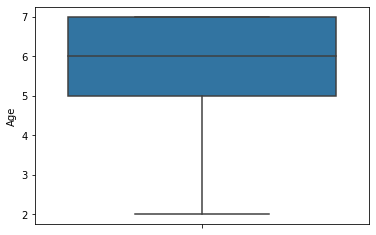

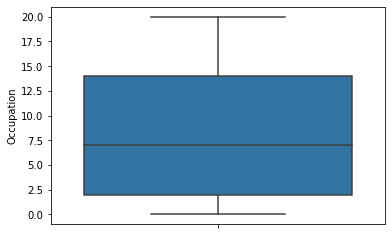

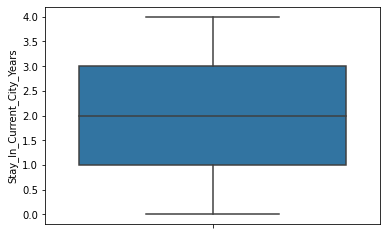

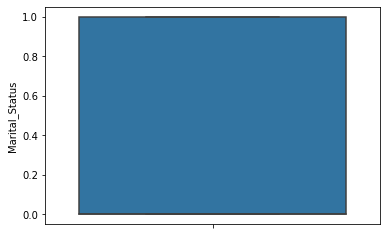

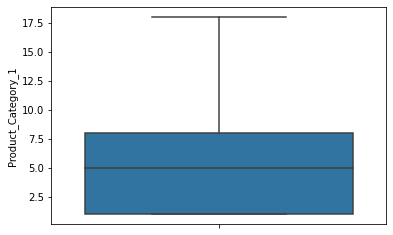

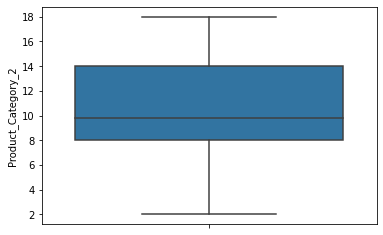

In [50]:
for c in Box_plot_1:
  percentile25 = df1[c].quantile(0.25)
  percentile75 = df1[c].quantile(0.75)
  IQR = percentile75 - percentile25
  Upperlimit = percentile75 + 1.5*IQR
  Lowerlimit = percentile25 - 1.5*IQR
  df1= df1[df1[c]<=Upperlimit]
  df1 = df1[df1[c]>=Lowerlimit]
  plt.figure()
  sns.boxplot(y=c, data =df1)

### Pairplot graph 

In [131]:
df1_pp=df1[['Age','Occupation','Stay_In_Current_City_Years',
            'Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']]

df1_pp.head(2)

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
4,2,16,4,0,8,9.842329,12.668243
5,7,15,3,0,1,2.000000,12.668243


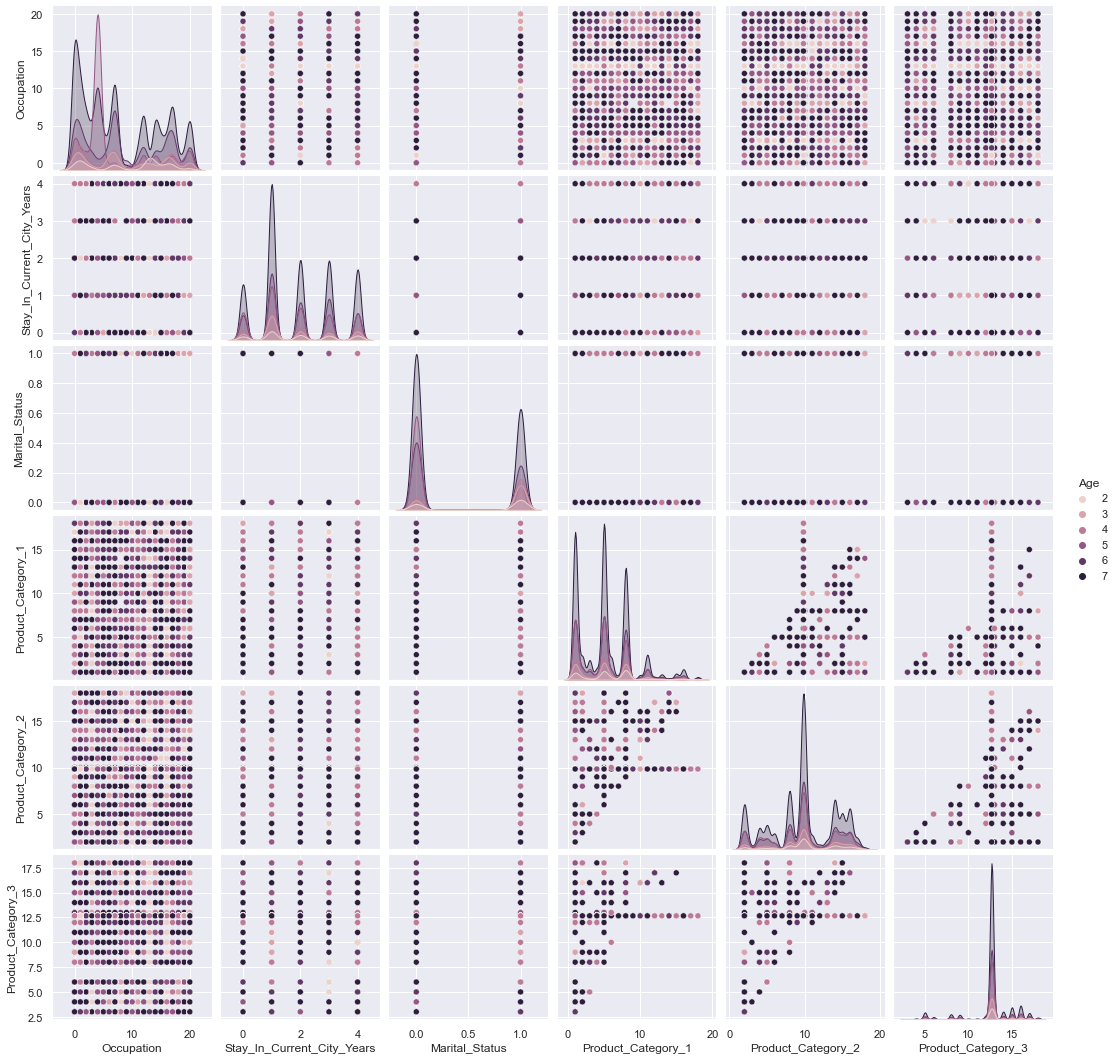

In [132]:
# sns.pairplot(df1_pp, hue='Age')

Pair plot takes lots of time so for easy convenience I have also attached the image of it 

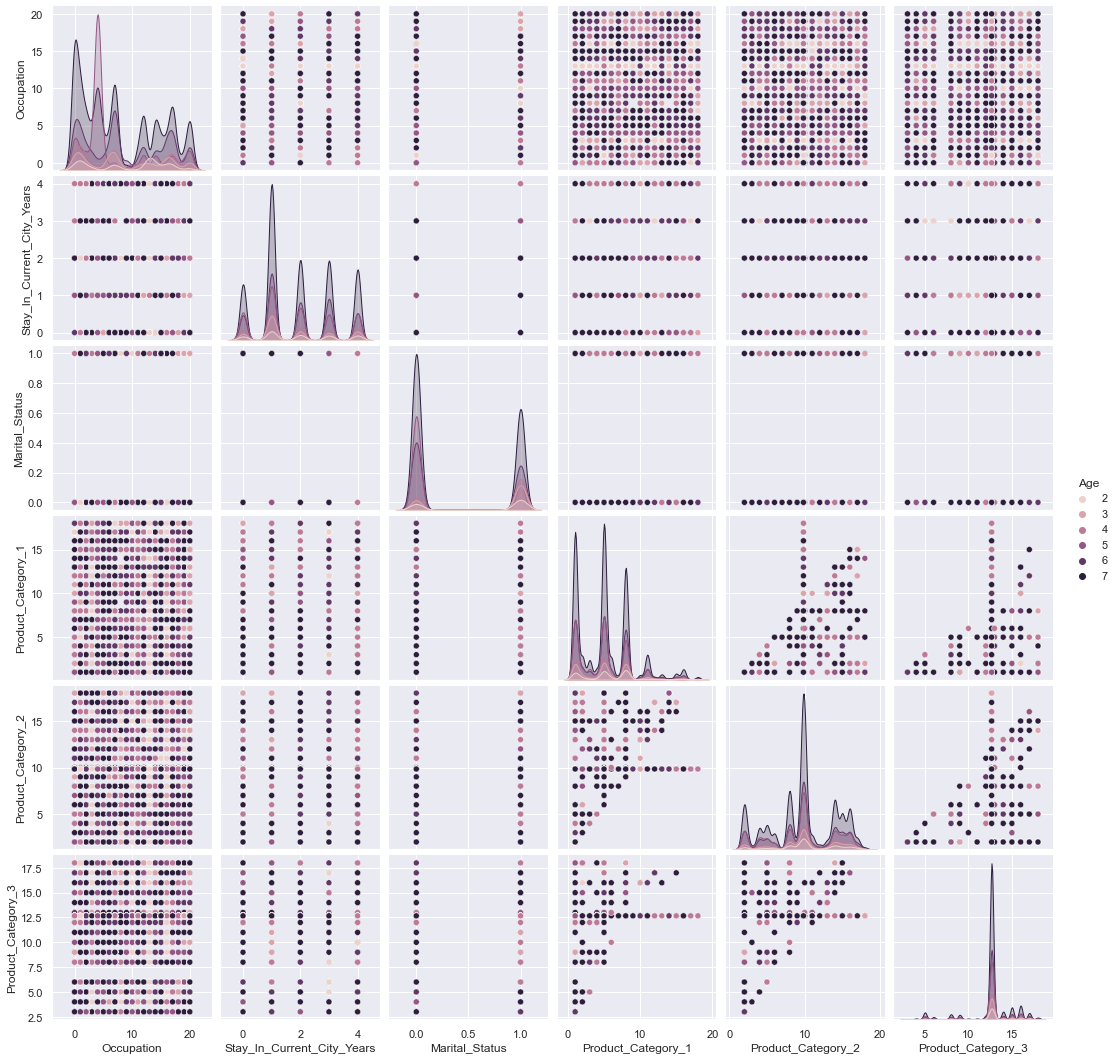

### HeatMap

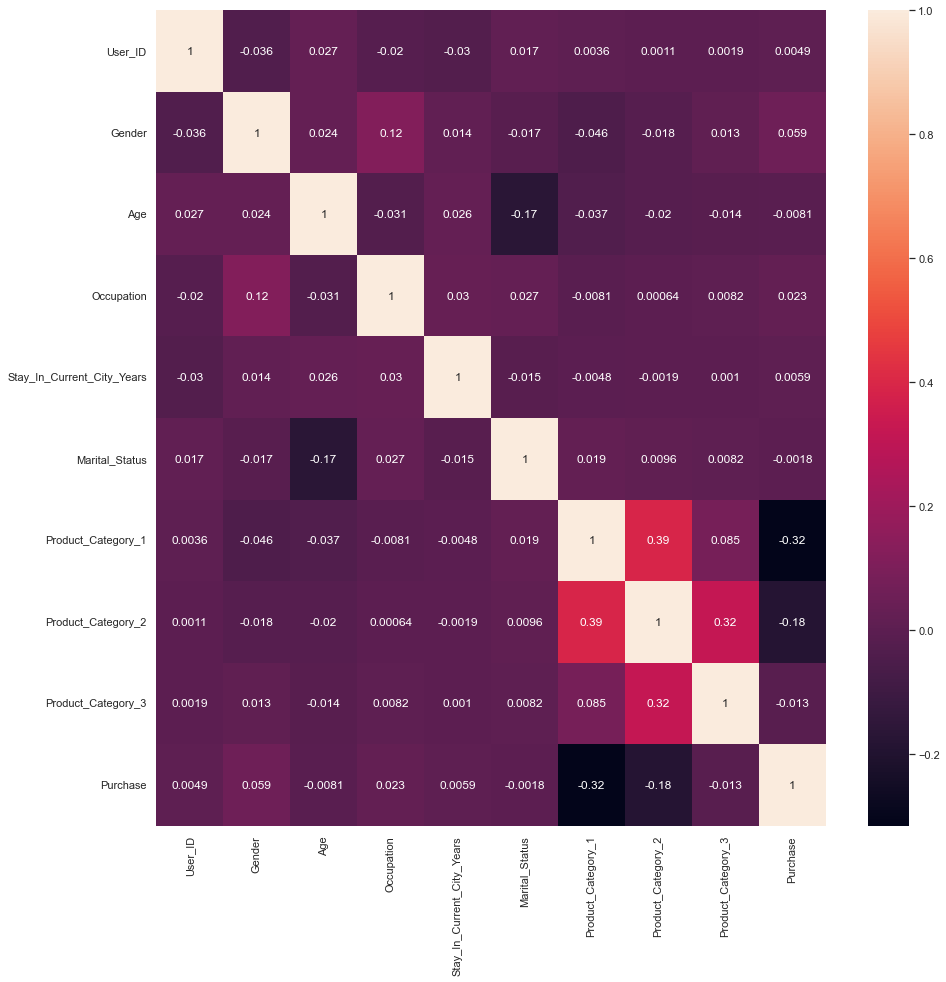

In [130]:
sns.heatmap(df1.corr(),annot = True)
sns.set(rc={'figure.figsize':(20,20)})

# DATA VISUALIZATION

### Visualize an individual column

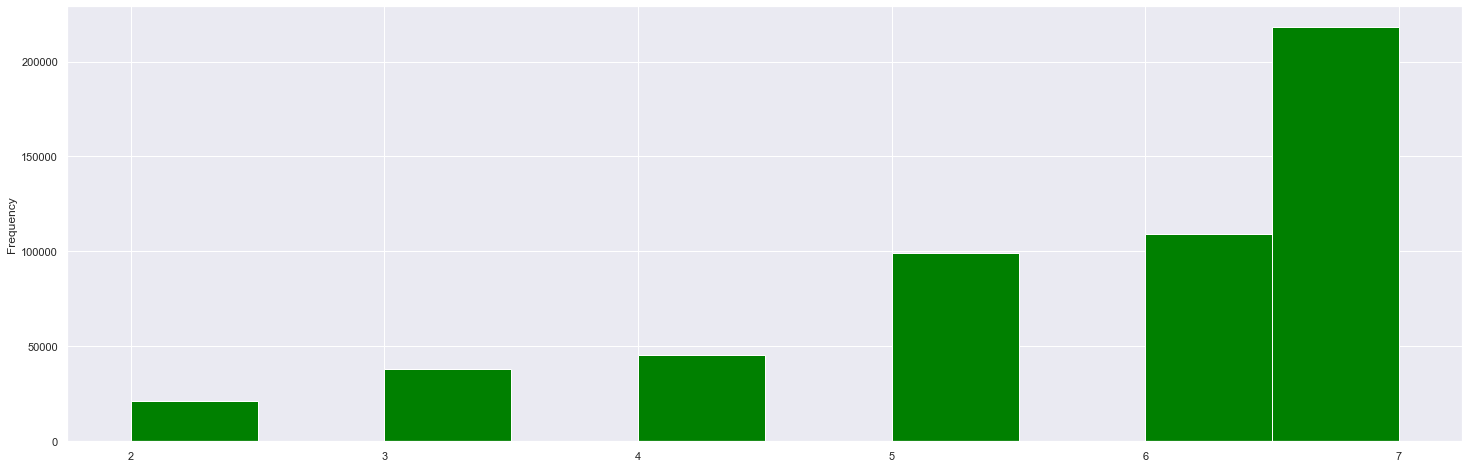

In [127]:
df1["Age"].plot.hist(color='green')
sns.set(rc={'figure.figsize':(15,5)})

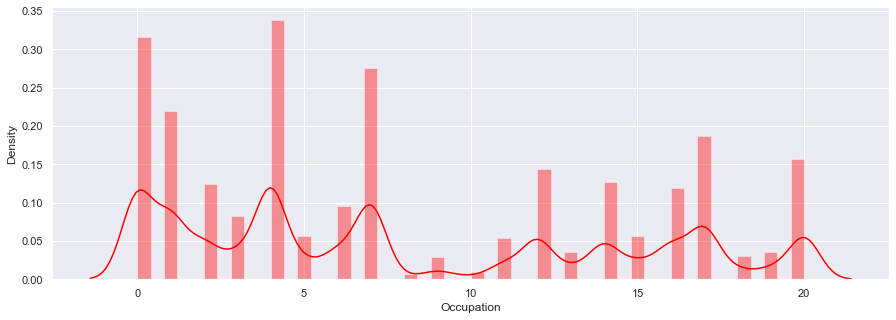

In [55]:
sns.distplot(df1["Occupation"],color='Red')
sns.set(rc={'figure.figsize':(15,5)})

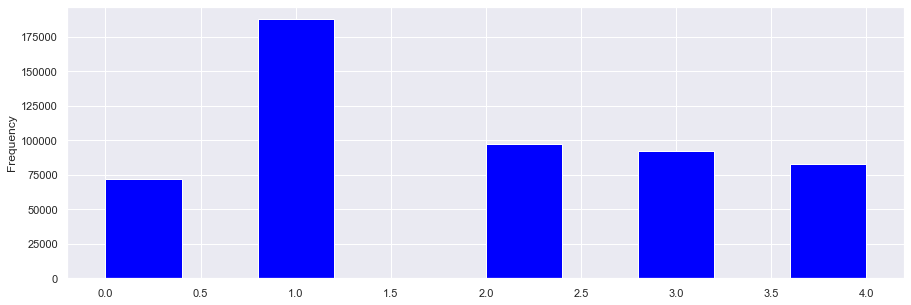

In [56]:
df1["Stay_In_Current_City_Years"].plot.hist(color='blue')
sns.set(rc={'figure.figsize':(15,5)})

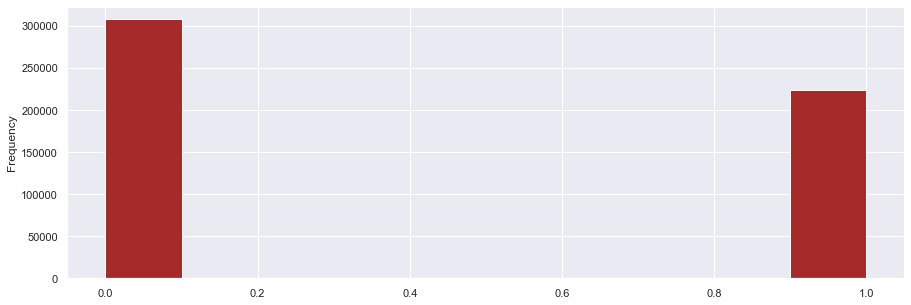

In [57]:
df1["Marital_Status"].plot.hist(color='brown')
sns.set(rc={'figure.figsize':(15,5)})

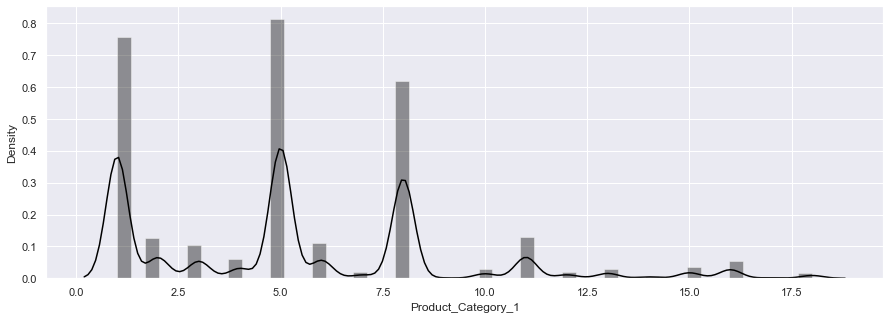

In [58]:
sns.distplot(df1["Product_Category_1"],color='black')
sns.set(rc={'figure.figsize':(15,5)})

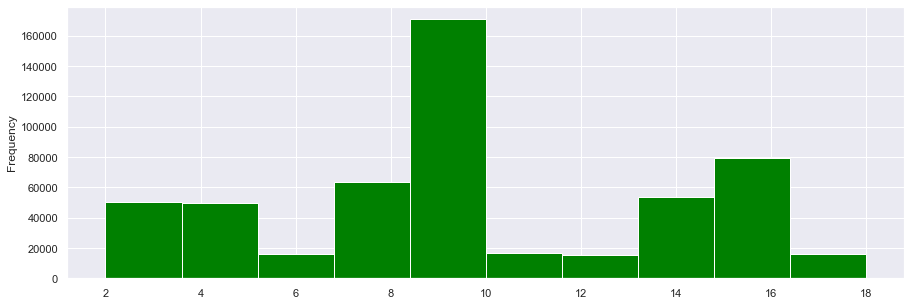

In [59]:
df1["Product_Category_2"].plot.hist(color='green')
sns.set(rc={'figure.figsize':(15,5)})

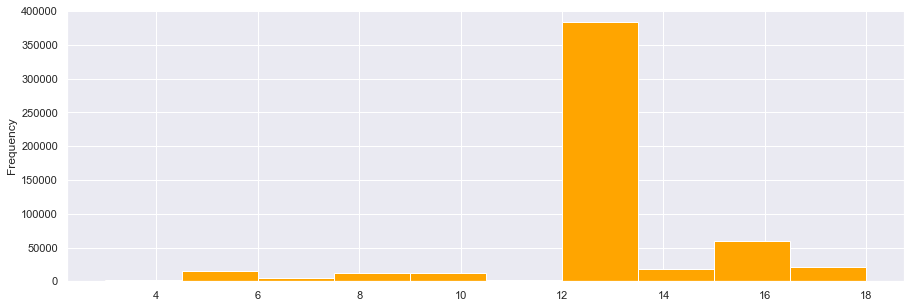

In [60]:
df1["Product_Category_3"].plot.hist(color='orange')
sns.set(rc={'figure.figsize':(15,5)})

### Age vs Purchase

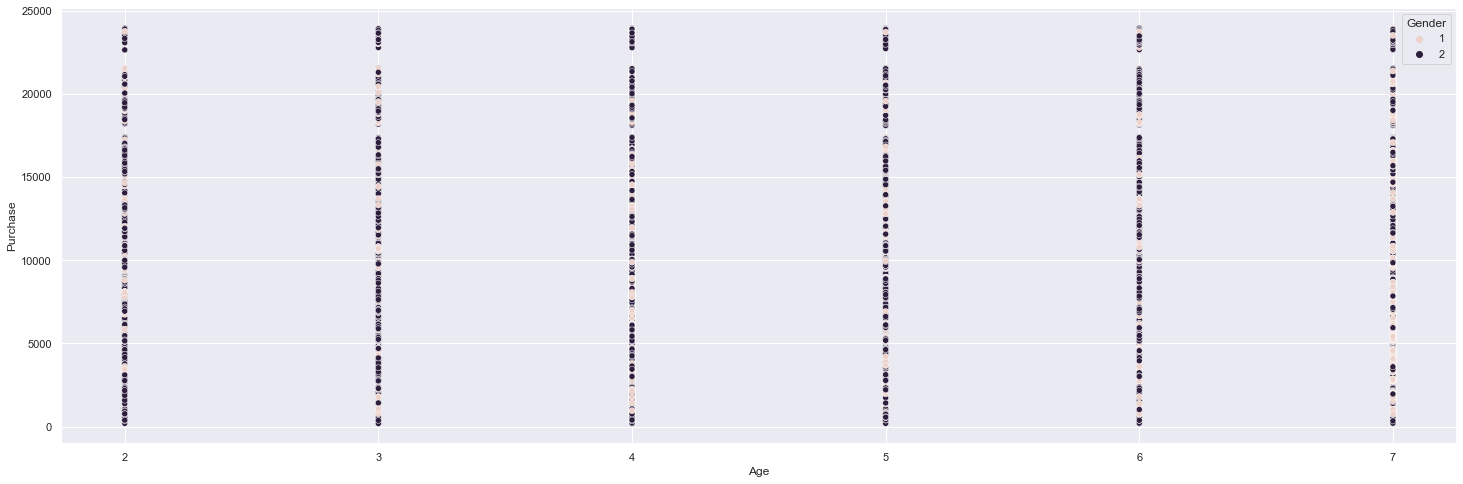

In [126]:
sns.scatterplot(x='Age', y='Purchase', hue='Gender', data=df1)
sns.set(rc={'figure.figsize':(25,8)})

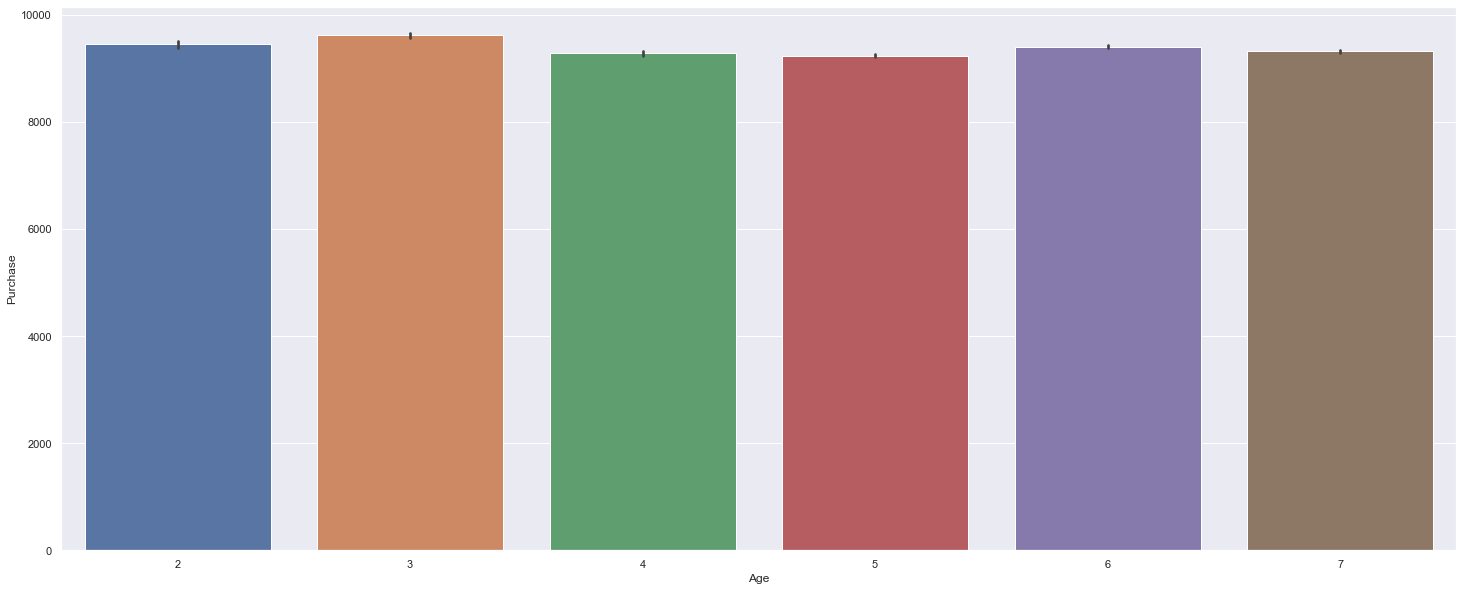

In [124]:
sns.barplot(x="Age", y="Purchase", data=df1)
sns.set(rc={'figure.figsize':(25,10)})

### Occupation vs Purchased

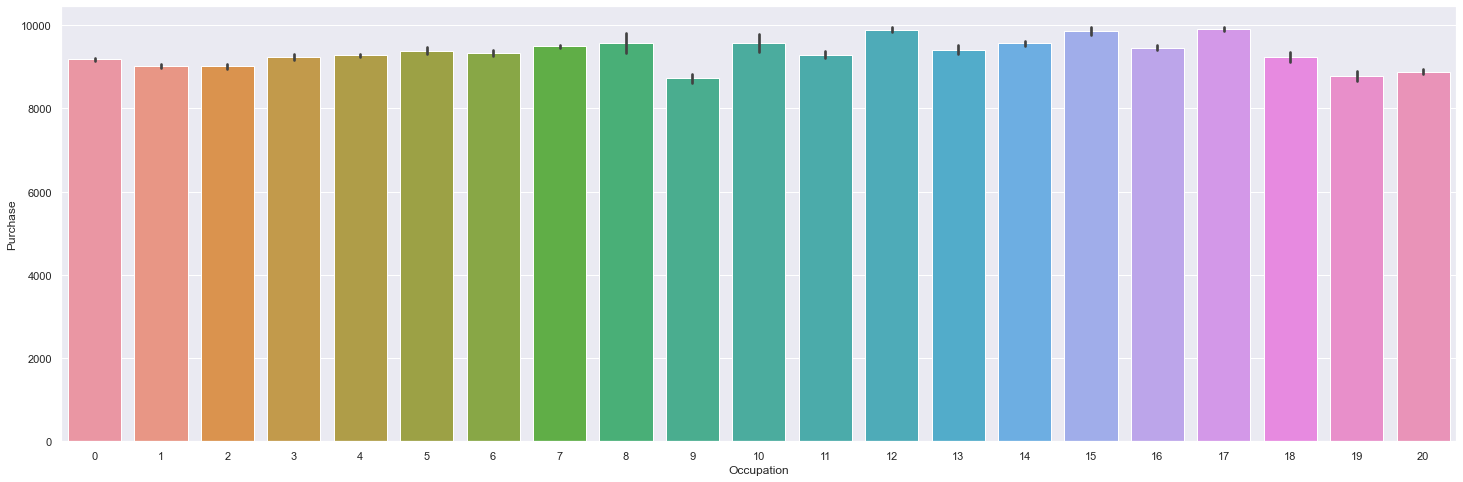

In [63]:
sns.barplot(x="Occupation", y="Purchase", data=df1)
sns.set(rc={'figure.figsize':(25,10)})

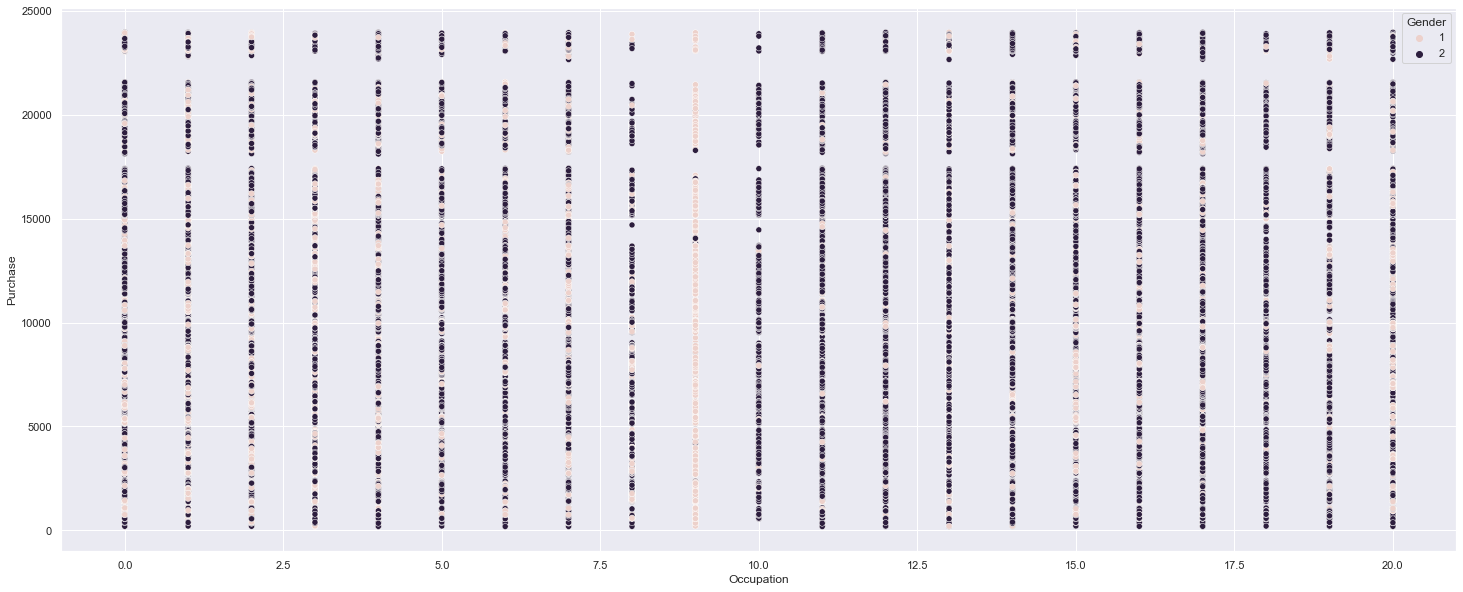

In [125]:
sns.scatterplot(x='Occupation', y='Purchase', hue='Gender', data=df1)
sns.set(rc={'figure.figsize':(25,8)})

In [65]:
df1.head(5)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4,1000002,2,2,16,C,4,0,8,9.842329,12.668243,7969
5,1000003,2,7,15,A,3,0,1,2.000000,12.668243,15227
6,1000004,2,4,7,B,2,1,1,8.000000,17.000000,19215
7,1000004,2,4,7,B,2,1,1,15.000000,12.668243,15854
8,1000004,2,4,7,B,2,1,1,16.000000,12.668243,15686


### Product_category_1 vs Purchased

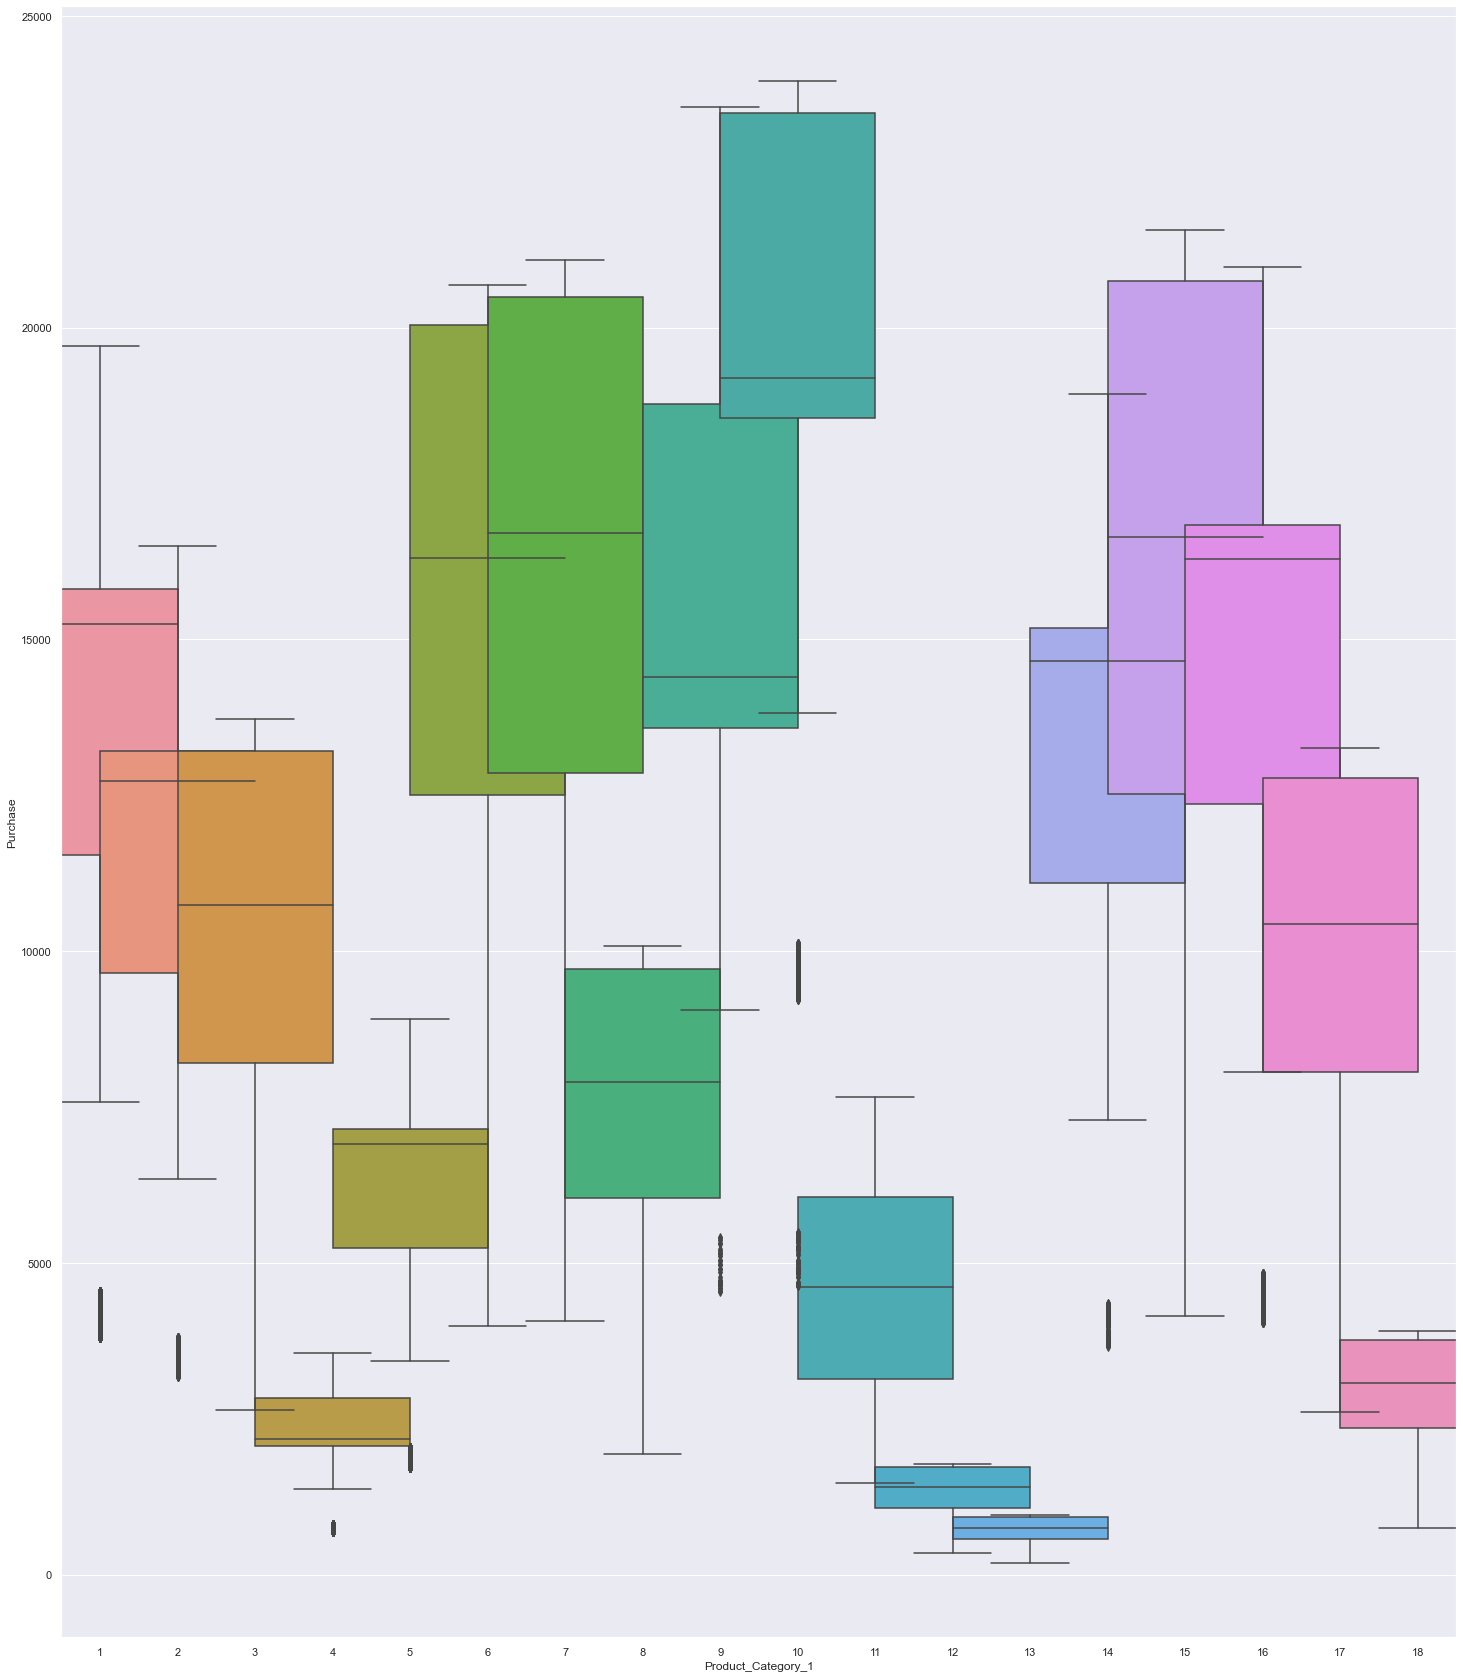

In [122]:
sns.boxplot(x='Product_Category_1', y='Purchase', data=df1, width=2)
sns.set(rc={'figure.figsize':(30,30)})

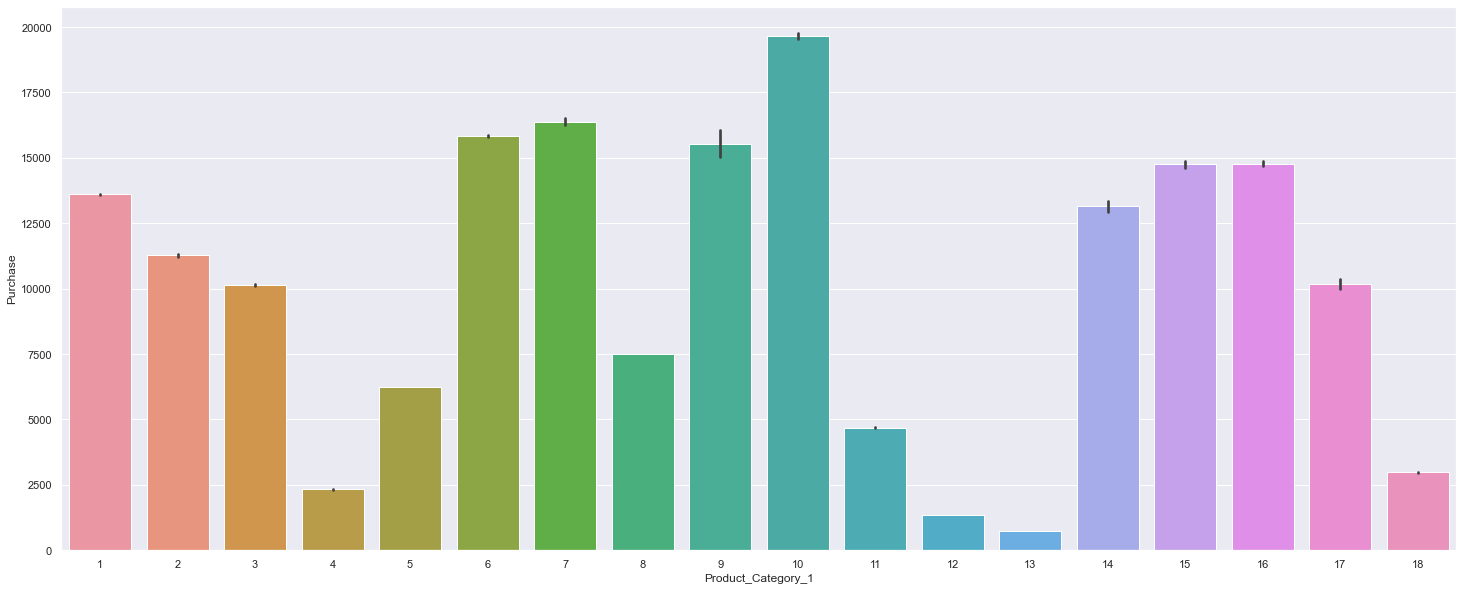

In [117]:
sns.barplot(x='Product_Category_1', y='Purchase', data=df1)
sns.set(rc={'figure.figsize':(25,10)})

### Product_category_2 vs Purchased

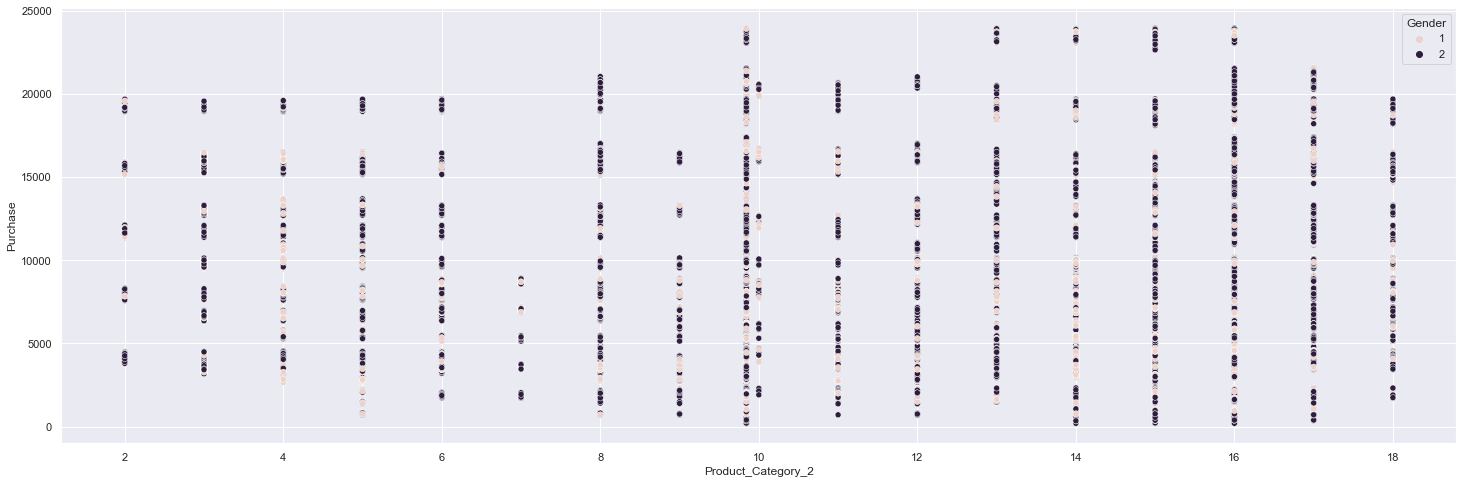

In [68]:
sns.scatterplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df1)
sns.set(rc={'figure.figsize':(25,10)})

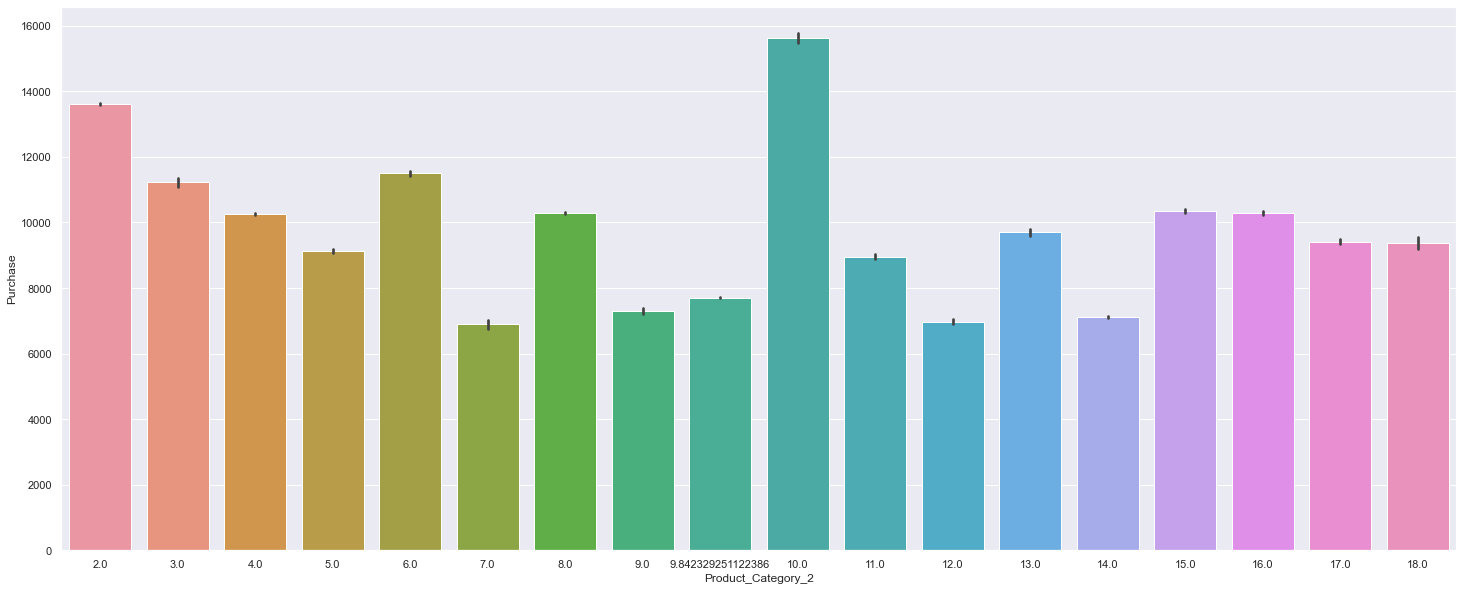

In [69]:
sns.barplot(x='Product_Category_2', y='Purchase', data=df1)
sns.set(rc={'figure.figsize':(25,10)})

### Product_category_3 vs Purchased

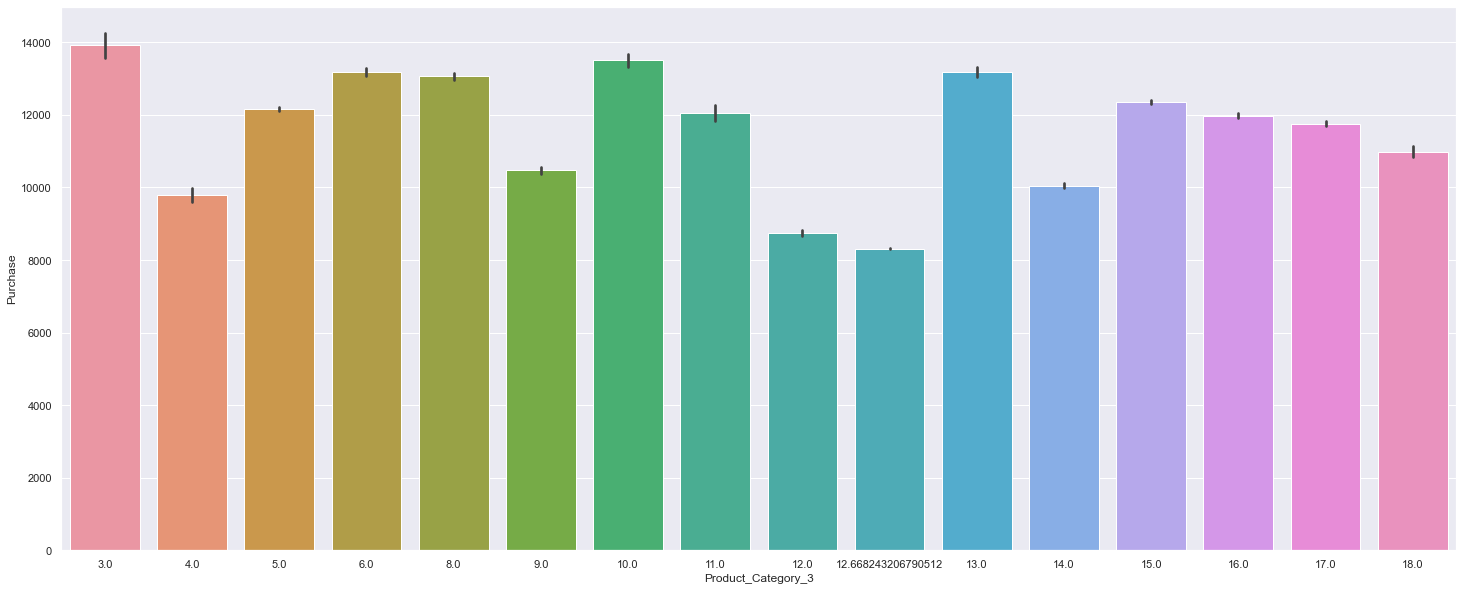

In [70]:
sns.barplot(x='Product_Category_3', y='Purchase', data=df1)
sns.set(rc={'figure.figsize':(25,10)})


### City category pie chart

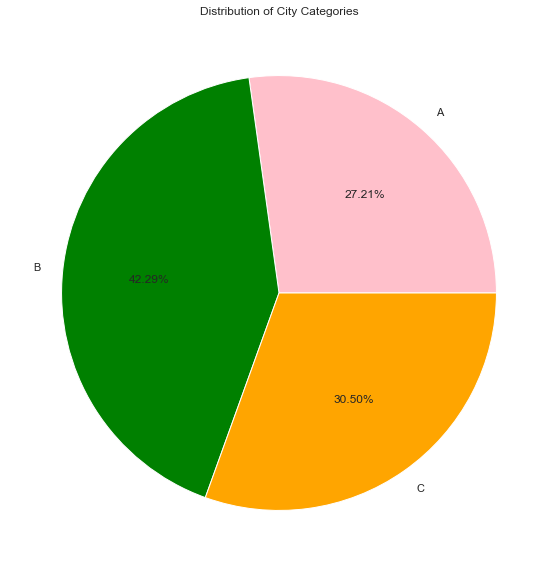

In [116]:
category_count = df1.groupby('City_Category')['City_Category'].count()
values = category_count.values.tolist()
labels = category_count.index.tolist()
colors = ['pink', 'green', 'orange']
plt.pie(values, labels=labels, colors=colors,autopct='%2.2f%%')
plt.title('Distribution of City Categories')
plt.show()
sns.set(rc={'figure.figsize':(25,10)})

# Q2 ANSWER 

### Joining both the dataset

In [72]:
df=pd.concat([df1,df2])
df

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4,1000002,2,2,16,C,4,0,8,9.842329,12.668243,7969.0
5,1000003,2,7,15,A,3,0,1,2.000000,12.668243,15227.0
6,1000004,2,4,7,B,2,1,1,8.000000,17.000000,19215.0
7,1000004,2,4,7,B,2,1,1,15.000000,12.668243,15854.0
8,1000004,2,4,7,B,2,1,1,16.000000,12.668243,15686.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,1,7,15,B,4,1,8,9.849586,12.669454,NaN
233595,1006036,1,7,15,B,4,1,5,8.000000,12.669454,NaN
233596,1006036,1,7,15,B,4,1,1,5.000000,12.000000,NaN
233597,1006037,1,4,1,C,4,0,10,16.000000,12.669454,NaN


In [73]:
df.dropna(inplace=True)

### One Hot Encoding

In [74]:
df= pd.get_dummies(df,columns=["City_Category"],drop_first=True)

In [75]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'City_Category_B', 'City_Category_C'],
      dtype='object')

In [76]:
x= df[['User_ID', 'Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'City_Category_B', 'City_Category_C']].values

x

In [77]:
y = df['Purchase'].values

In [78]:
y

array([ 7969., 15227., 19215., ...,  7852.,  7159., 11640.])

In [79]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state =25)

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test =sc.transform(x_test)

# Model Training

### Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)

y_pred1 = reg.predict(x_train)

In [107]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.37591108078261404

In [108]:
r2_score(y_train, y_pred1)

0.11098688378817345

### Decision Tree Regressor

In [109]:
from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor()

In [110]:
dc.fit(x_train,y_train)

DecisionTreeRegressor()

In [111]:
y_pred=dc.predict(x_test)

In [112]:
r2_score(y_test, y_pred)

0.510263364767475

In [113]:
r2_score(y_train, y_pred1)

0.11098688378817345

### Random Forest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [99]:
no_of_decision_tree = [10,20,30,40,50,60,70,80,90,100]
max_no_of_features = ['sqrt','log2']
max_depth = [6,7,8,9,10,11,12,13,14,15]
criterion_of_decision_tree = ["squared_error", "poisson"]
min_sample_split=[2,3,4,5,6]

In [100]:
random_grid = {
    'n_estimators' : no_of_decision_tree,
    'max_features' : max_no_of_features,
    'max_depth' : max_depth,
    'criterion' : criterion_of_decision_tree,
    'min_samples_split' : min_sample_split
}

Hyper Parameter Tuning

In [101]:
# from sklearn.model_selection import RandomizedSearchCV
# rscv = RandomizedSearchCV(estimator = rf , param_distributions = random_grid , n_iter = 25 , cv = 5 ,n_jobs=-1)
# rscv.fit(x_train, y_train)

In [102]:
# rscv.best_params_

In [103]:
# rf = RandomForestRegressor(n_estimators = 100 , min_samples_split = 2, max_features =  'log2', max_depth = 14, criterion='poisson')

In [104]:
# rf.fit(x_train,y_train)
# # y_pred = rf.predict(x_test)